<a href="https://colab.research.google.com/github/yehuda-yu/Data_Science_Projects/blob/main/2_Distribution__Viz_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Data Sciecne (71253) - Problem Set 2

## 1. Visualizing the OKCupid dataset

In [1]:
# connect google drive to the notebook (i'm working with Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# import the packeges
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# reading the csv file into DataFrame:
path = '/content/drive/MyDrive/gdrive_folder/Courses/Intro_Data_Science/okcupid_profiles_ps1 (1).csv'
df = pd.read_csv(path)

In [4]:
df.columns

Index(['Unnamed: 0', 'age', 'status', 'sex', 'orientation', 'body_type',
       'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income',
       'job', 'last_online', 'location', 'offspring', 'pets', 'religion',
       'sign', 'smokes', 'speaks'],
      dtype='object')

### 1.1 Plot the distribution of "drinks" variable

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

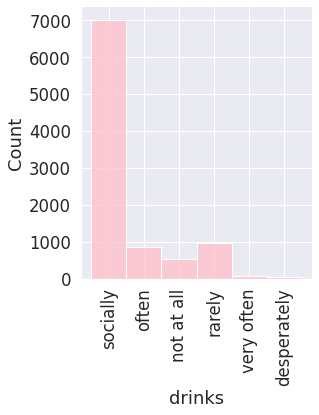

In [36]:
sns.set(font_scale = 1.5) # font size
g = sns.displot(df, x="drinks", color = "pink")
plt.xticks(rotation=90) # 90 deg of the x ticks

### 1.2 Plot the distribution of "drinks" variable stratified by sex (on a single graph) 

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

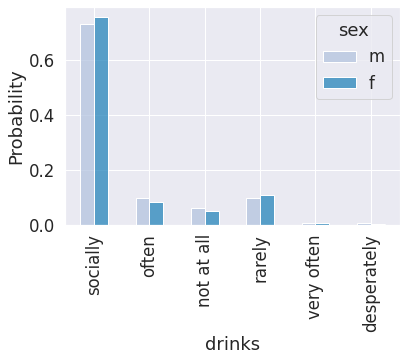

In [39]:
g = sns.histplot(df, x="drinks", hue='sex',multiple="dodge",discrete=True,stat = 'probability',common_norm=False, palette="PuBu",shrink=0.5)
plt.xticks(rotation=90) # 90 deg of the x ticks

### 1.3 Based on your plot, do you think men and women differ in the drinking habits?

##### When we look on the **probability** there is **no singnificant different between men and women**. (If we realy want to be sure we need to do T - test)

***

## 2. Typical values

### 2.1 What are the mean, median, and mode of the 'drinks' variable of the OKCupid users?

Treat 'drinks' as an ordinal variable, with the following order: ['desperately', 'very often', 'often', 'socially', 'rarely', 'not at all']  
> Note that you'll have to encode this variable using numeric values

In [75]:
# assign drinks to be a categorical variable
df["drinks_categor"] = df["drinks"].astype('category')
# use codes to encode variable
df["drinks_categor"] = df["drinks_categor"].cat.codes

# Crate a dictionary with categorial key and number value:
keys = df["drinks_categor"].unique()
values= df["drinks"].unique()
dictionary = dict(zip(keys, values))

# find the median and mode:
med = dictionary[df["drinks_categor"].median()]
mode = df['drinks'].value_counts().index[0]

# Print the results
print("No mean to categorial data")
print(f"The median of drinks is {med}")
print(f"The mode of drinks is {mode}")

No mean to categorial data
The median of drinks is socially
The mode of drinks is socially


### 2.2 What are the mean, median, and mode of the income values of the OKCupid users?

In [84]:
# Create new df for the income above 0
df_income = df.income[df.income>=0]

mean_income = int(df_income.mean())
med_income = int(df_income.median())
mode_income = df_income.value_counts().index[0]

# Print the results
print(f"The mean of income is {mean_income}")
print(f"The median of income is {med_income}")
print(f"The mode of income is {mode_income}")

The mean of income is 101674
The median of income is 50000
The mode of income is 20000


(array([-500000.,       0.,  500000., 1000000., 1500000.]),
 <a list of 5 Text major ticklabel objects>)

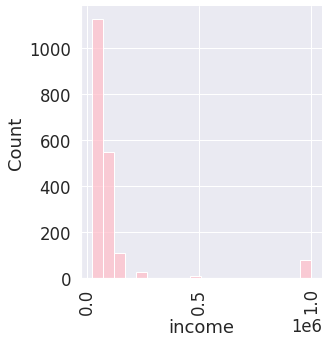

In [88]:

g = sns.displot(df_income, color = "pink", bins = 20)
plt.xticks(rotation=90) # 90 deg of the x ticks

#### What do these statistics tell you about the shape of the income distriubiton in general population?

##### Its can tell us about the general population just if we assume that the users are represent the population. It will be inaccurate to assume it...

#### Plot the distribution of income variable. Indicate the mean mode and median on the plot.

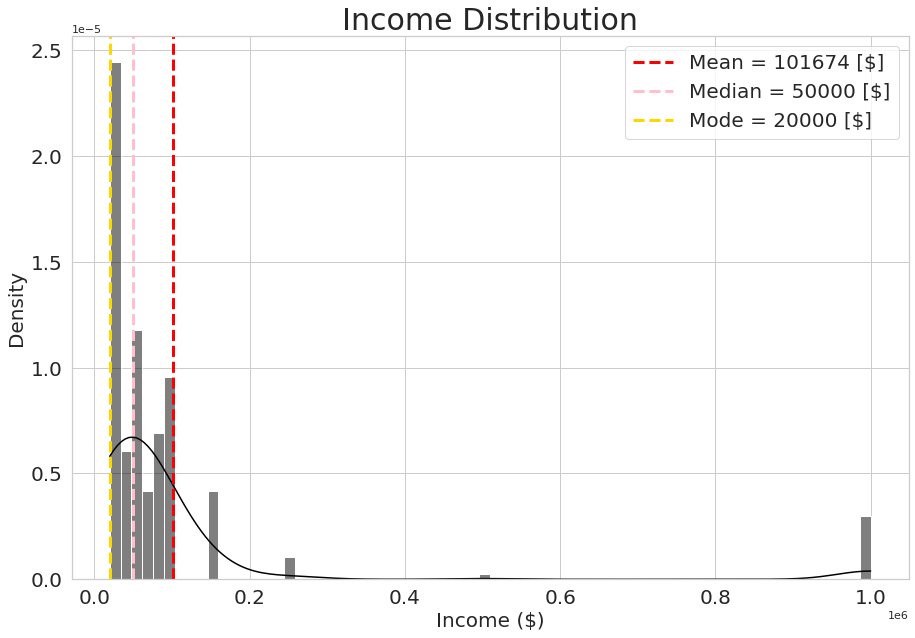

In [91]:
# graph
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, figsize=(15,10))
ax = sns.histplot(x=df_income, bins=70, kde = True, stat = "density", color = "black")
plt.axvline(x=df_income.mean(), color='red',ls='--',lw=3,label = f"Mean = {mean_income} [$]")
plt.axvline(x=df_income.median(),color='pink',ls='--',lw=3,label = f"Median = {med_income} [$]")
plt.axvline(x=df_income.value_counts().index[0],color='gold',ls='--',lw=3,label = f"Mode = {mode_income} [$]")
ax.set_xlabel("Income ($)",fontsize=20)
ax.set_ylabel("Density",fontsize=20)
ax.set_title("Income Distribution",fontsize=30)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend(loc='best',fontsize = 20)

***